<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/AP_Politics_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Politics and Ethics
#Assignment 1
#TLP 2022-2023


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **The Main Question: Is the BJP a Hindu Religious Party?**

## Survey Questions of Focus:
* Q2: 1 is Hindi, 2 is not Hindi
* Q3: 1->7 in decreasing order of news following
* Q3recs: 1 if selected, 2 if not, news medium.
* Q4: Economic Condition,1->4 decreasing.
* Q5: Expected Economic COndition: 1-> Worsening.
* Q11: Discrminiation against groups a->j, 1 Yes, 2 No.
* Q12: Politics interfereing with religious matters, 1->4 decreasing influence.
* Q17: Freedom to Practice (a: others, b: you), 1->4 decreasing, 5 depends/other/
* Q18: Knowledge of religions (a->f), 1->4 decreasing.
* QRELSING: REligion (1 HIndu, etc.)
* QCAste: 1-5: general-> Backward.
* QCasteb: Brahmin, other, etc.
* Q35: Importance of religion in your life, 1->5 descending.
* Q40: Religious/my religion is one true.
* QDIV: Religious Diversity benefits/harms, 1 benefit, 2 harms.
* Q61: Close friends same religion.
* Q62: religions a,b have in common.
* Q63: Willingness to accept neighbor.
* Q66: Felt discriminated.
* Q69: Important to be hindu, b
* Q77arec: Which party did you vote for, 1=bjp
* QPTYrec: Party felt closest to, 1 is bjp
* QPTY2: Favorable/unfavorable bjp congress

## 0. Data Import and Cleaning

In [ ]:
#Lets read the data:
Main_Path='/content/drive/MyDrive/Plaksha/Last Term at Plaksha/Chibber/India Religion Public Data - Pew Research Center (All Vars).csv'
Data=pd.read_csv(Main_Path)

<ipython-input-7-8c545a17780c>:3: DtypeWarning: Columns (47,48,73,74,75,76,77,78,79,80,81,82,83,84,87,91,174,175,209,245) have mixed types. Specify dtype option on import or set low_memory=False.
  Data=pd.read_csv(Main_Path)


In [ ]:
print(Data.shape)
#29,999 respondents
Data.head()

(29999, 308)


,COUNTRY,QRID,weight,QMLangRec,Q2,Q3rec_1,Q3rec_2,Q3rec_3,Q3rec_4,Q3rec_5,...,Q86b_19,Q86b_20,Q86b_21,Q86b_97,Q86b_98,Q86b_99,Q87,QIV7,REGION,Urban
0,1,23,0.776012,2,6,1,2,2,2,2,...,,,,,,,99,1,1,2
1,1,30,0.555058,2,2,1,2,2,2,2,...,,,,,,,99,,2,2
2,1,35,0.238959,2,2,1,2,2,2,2,...,,,,,,,2,,2,2
3,1,37,0.390951,2,1,1,1,2,2,1,...,,,,,,,2,1,5,1
4,1,67,1.553954,2,2,2,1,2,2,2,...,,,,,,,2,,6,1


In [ ]:
All_Cols=list(Data.columns)

In [ ]:
#Okay, lets see how much cleaning we need to do
Data.describe()

,COUNTRY,QRID,weight,QMLangRec,Q2,Q4,Q5,Q6a,Q6b,Q6c,...,Q83,QPTYrec,QPTY2a,QPTY2b,Q85,q85arec,Q86a,Q87,REGION,Urban
count,29999.0,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,...,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,1.0,19827.193540,1.000000,1.633521,3.526784,3.036768,6.900630,2.587853,3.321877,5.490116,...,2.426981,28.090503,24.877763,26.187840,3.120137,1.498117,2.710190,2.462449,3.881029,1.693290
std,0.0,8724.296721,1.092437,0.481850,7.180927,9.836835,22.545188,11.654395,13.875048,19.278890,...,8.513238,38.841296,41.091543,41.643722,7.498977,6.572519,8.497813,6.980389,1.572253,0.461136
min,1.0,23.000000,0.061942,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,12287.500000,0.368771,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000
50%,1.0,19827.000000,0.682999,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,4.000000,2.000000
75%,1.0,27379.500000,1.242504,2.000000,6.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,2.000000,25.000000,4.000000,4.000000,3.000000,1.000000,2.000000,2.000000,5.000000,2.000000
max,1.0,34929.000000,8.608335,2.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,6.000000,2.000000


<ipython-input-12-f120775e2989>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr())


<Axes: >

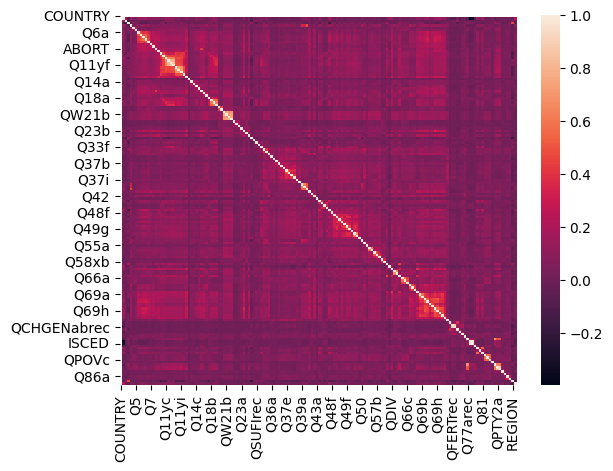

In [ ]:
#Lets see which features are correlated:

sns.heatmap(Data.corr())

## 1. Who is the BJP?

In [ ]:
#Alright, first lets get the demographic we'll use, the BJP folks
BJP_Cols=['Q77arec','QPTYrec','QPTY2a','QPTY2b']
All_Cols=['QRID','Q77arec','QPTYrec','QPTY2a','QPTY2b']
Sub=Data[All_Cols]
Sub.sample(10)

#Q77arec: did you vote in the national election, if so:
#1.   BJP
#2.   Congress
#24.  Voted, Other
#994. Voted, Don't Know
#996. Did not Vote
#997. Not eligible to vote
#998. Don't Know
#999. Refused

#I think a Good way to look at this column would be BJP vs Not BJP

def bjpcheck(row):
  if row['Q77arec']==1:
    return 1

  else:
    # print(type(row['Q77arec']),row['Q77arec'])
    return 0


Sub['is BJP']=Sub.apply(lambda row: bjpcheck(row),axis=1)
Sub=Sub.drop(columns=['Q77arec'])

# sns.heatmap(Sub[BJP_Cols])


#Lets sort this visualization by the is bjp
Sub=Sub.sort_values('is BJP')

<ipython-input-14-30d18f8ce7b1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sub['is BJP']=Sub.apply(lambda row: bjpcheck(row),axis=1)


<Axes: >

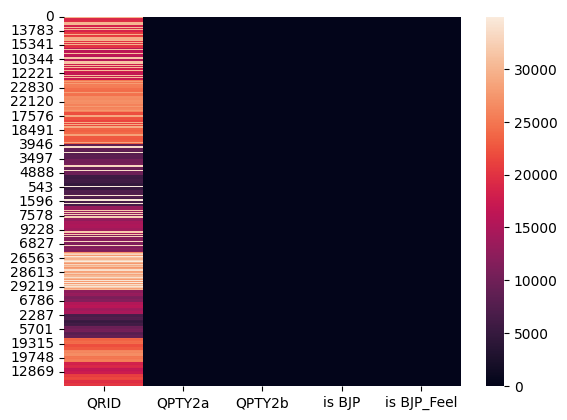

In [ ]:
#Lets do QPTYrec now

def bjpcheck(row):
  if row['QPTYrec']==1:
    return 1

  else:
    # print(type(row['Q77arec']),row['Q77arec'])
    return 0


Sub['is BJP_Feel']=Sub.apply(lambda row: bjpcheck(row),axis=1)
Sub=Sub.drop(columns=['QPTYrec'])

sns.heatmap(Sub)

<Axes: >

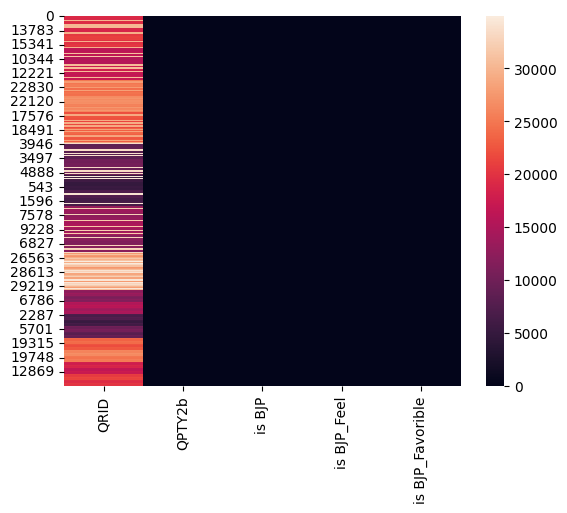

In [ ]:
#Lets do QPTY2a now

def bjpcheck(row):
  if row['QPTY2a']<=1:
    return 1

  else:
    # print(type(row['Q77arec']),row['Q77arec'])
    return 0


Sub['is BJP_Favorible']=Sub.apply(lambda row: bjpcheck(row),axis=1)
Sub=Sub.drop(columns=['QPTY2a'])

sns.heatmap(Sub)

<Axes: >

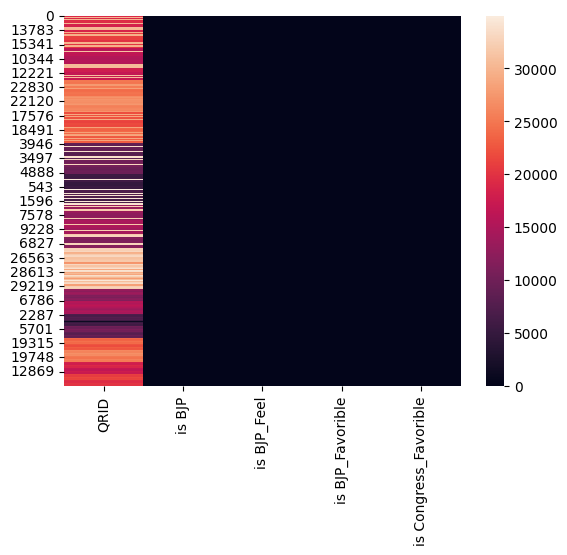

In [ ]:
def bjpcheck(row):
  if row['QPTY2b']<=1:
    return 1

  else:
    # print(type(row['Q77arec']),row['Q77arec'])
    return 0


Sub['is Congress_Favorible']=Sub.apply(lambda row: bjpcheck(row),axis=1)
Sub=Sub.drop(columns=['QPTY2b'])

#Wow, at the end of all that, a clear pattern emerges.
sns.heatmap(Sub)

<Axes: >

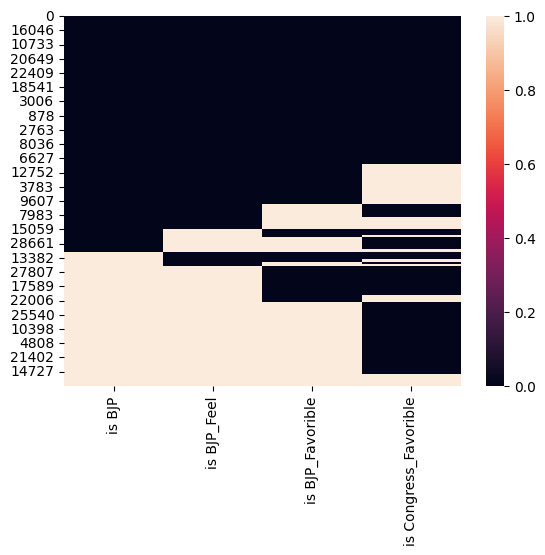

In [ ]:
# Lets sort the whole thing

Sub=Sub.sort_values(['is BJP','is BJP_Feel','is BJP_Favorible','is Congress_Favorible'])
sns.heatmap(Sub[['is BJP','is BJP_Feel','is BJP_Favorible','is Congress_Favorible']])

###Lets see this as a Sankey

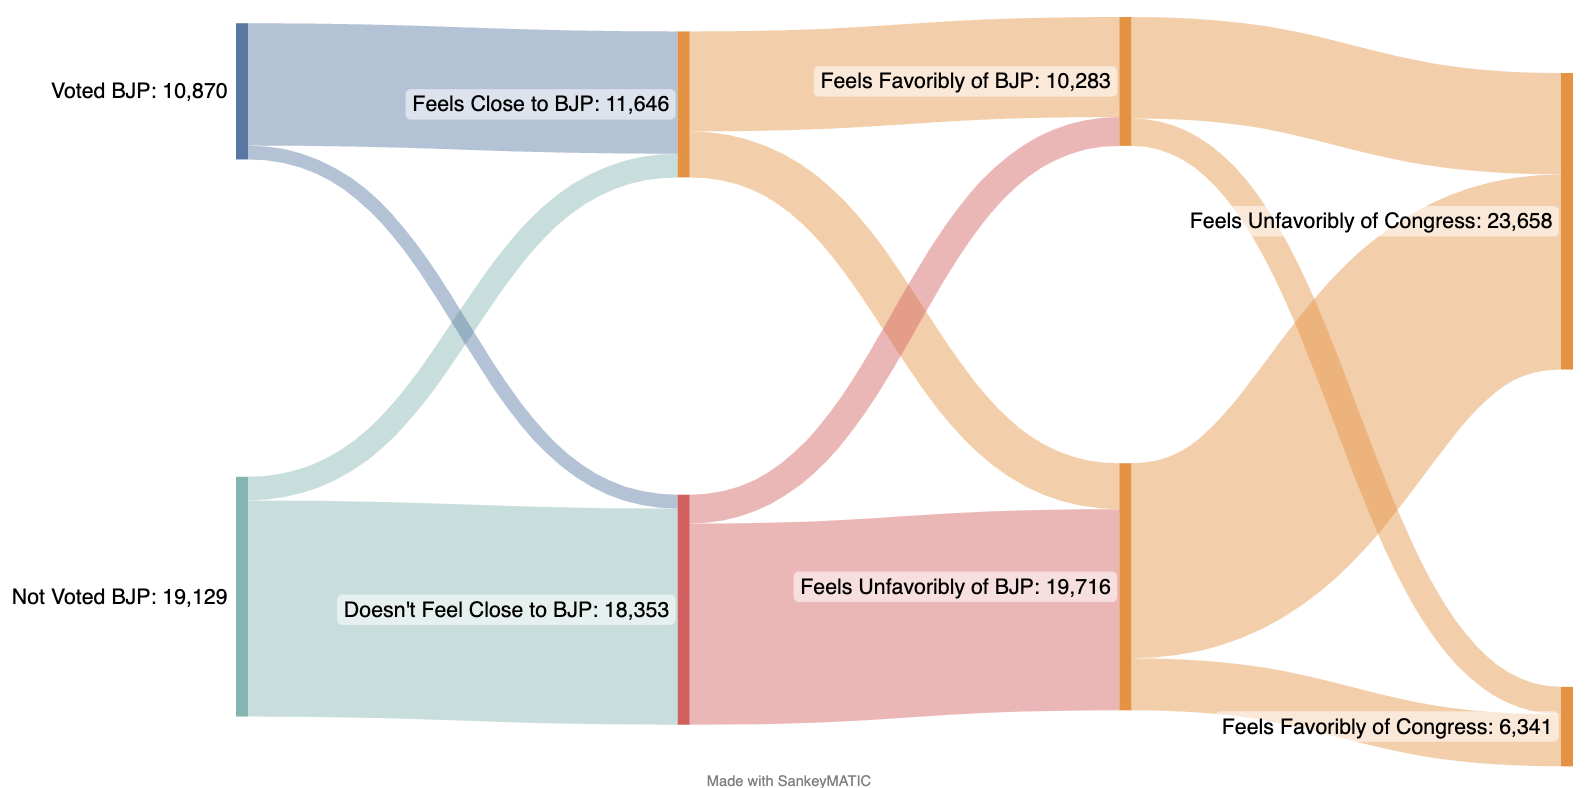

In [ ]:
Cols=['is BJP','is BJP_Feel','is BJP_Favorible','is Congress_Favorible']

Sub[Cols[2:4]].value_counts().reset_index()

,is BJP_Favorible,is Congress_Favorible,0
0,0,0,15566
1,1,0,8092
2,0,1,4150
3,1,1,2191


In [ ]:
#Lets take a look at all combinations we have of these questions, and what the counts look like.
Sub[['is BJP','is BJP_Feel','is BJP_Favorible','is Congress_Favorible']].value_counts().reset_index()

,is BJP,is BJP_Feel,is BJP_Favorible,is Congress_Favorible,0
0,0,0,0,0,11994
1,1,1,1,0,5869
2,0,0,0,1,3269
3,1,1,0,0,2423
4,0,0,1,0,1060
5,0,1,1,0,938
6,1,1,1,1,923
7,0,0,1,1,922
8,1,0,0,0,609
9,1,1,0,1,547


###Okay, from this we can extract many groups (bold is our focus):
* All BJP voters (1,): n=10870
* Core Part, hate congress, (1,1,1,0): n= 5869
* **More generalized core, can like congress, (1,1,1,): n= 6792**
* Feel Close and Voted BJP, but dont view favorably (1,1,0,): n=2970

In [ ]:
#Lets put a flag against the generalized core
def setFlag(row):

  if row['is BJP']==1 and row['is BJP_Feel']==1 and row['is BJP_Favorible']==1:
    return 1

  else:
    return 0
Sub['FLAG']=Sub.apply(lambda row: setFlag(row),axis=1)

In [ ]:
Sub['FLAG'].value_counts()

0    23207
1     6792
Name: FLAG, dtype: int64

## 2. What were the features that constituted predictors for whether someone is considered BJP?

In [ ]:
#Lets construct the dataset by merging in our flags
Large=pd.merge(Data,Sub,how='inner',on='QRID')

#Lets drop our new cols
Large=Large.drop(columns=['weight','QRID','is BJP','is BJP_Feel','is BJP_Favorible','is Congress_Favorible'])

#As well as the cols they are derived from
Large=Large.drop(columns=BJP_Cols)

#First, we go basic
X=Large.drop(columns=['FLAG'])
y=Large['FLAG']

In [ ]:
#OKay now, lets dummy out every single variable (this will be massive)
X=X.astype(str)
X=pd.get_dummies(X,columns=list(X.columns))

In [ ]:
#Lets do our train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 2.1: Approach 1, training and fitting a decision tree.

In [ ]:
#Benefits of Decision Tree: Don't need to really modify the data,
# since it is categorical.
from sklearn.tree import DecisionTreeClassifier

#Lets set the following hyperparameters, using information gain as criteria
model = DecisionTreeClassifier(criterion='entropy',max_depth=5).fit(X_train,y_train)

In [ ]:
#Lets fit the tree
model.score(X_test,y_test)

0.7701010101010101

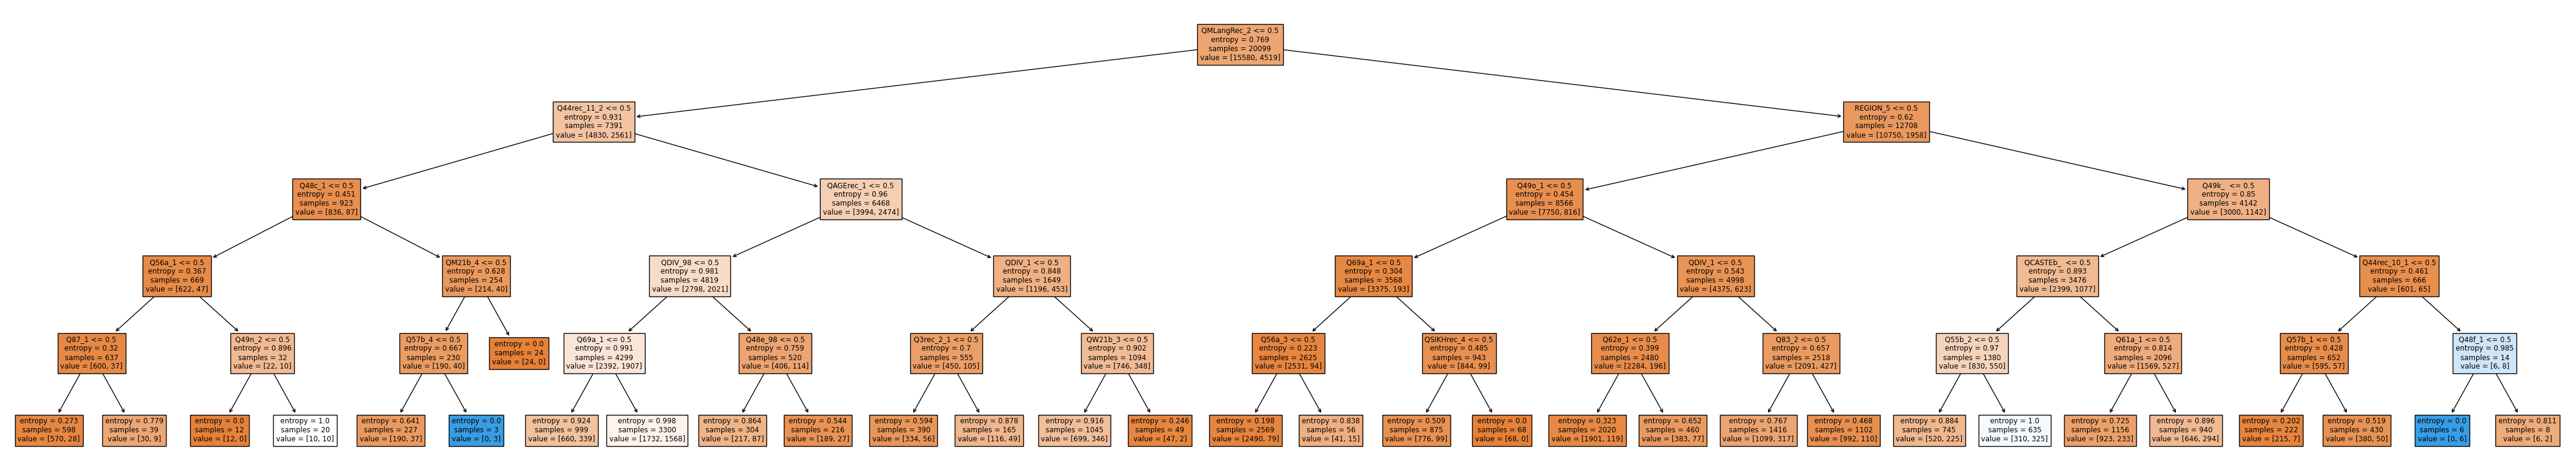

In [ ]:
#Lets plot
from sklearn import tree

fig = plt.figure(figsize=(55,10))
_ = tree.plot_tree(model,
                   feature_names=list(X_train.columns),
                   filled=True)

In [ ]:
#For this large decision trees, what is feature importance?

#Store feature importances in a dictionary
def sortDict(Dict):
    '''THis method sorts a dictionary by the descending order of
        its values'''

    Ret_Dict = {key: Dict[key] for key in sorted(Dict.keys(), key=Dict.__getitem__,reverse=True)}

    return Ret_Dict


#Now lets create the feature dict
Feature_Dict={}
for i in range(0,len(X_train.columns)):

  key=list(X_train.columns)[i]
  value=list(model.feature_importances_)[i]

  Feature_Dict[key]=value

#Sort
Feature_Dict=sortDict(Feature_Dict)

#Print
for key in Feature_Dict:
  value=Feature_Dict[key]

  if value>0:
    print(key,':',value)

QMLangRec_2 : 0.29631340796277816
REGION_5 : 0.20122370595440447
Q44rec_11_2 : 0.10930920677209603
Q49k_  : 0.04581063166488359
Q49o_1 : 0.03933642174778694
QDIV_1 : 0.039329474532463674
Q69a_1 : 0.03553162106144136
QAGErec_1 : 0.03454202716582231
QDIV_98 : 0.03162383418956294
QCASTEb_  : 0.025609478490278444
Q83_2 : 0.0217950175415012
Q55b_2 : 0.019428032958761558
Q62e_1 : 0.015535669092923941
Q56a_3 : 0.01222718314907536
Q61a_1 : 0.010429322957865729
QW21b_3 : 0.007580672308628397
Q48e_98 : 0.006206321828337452
Q44rec_10_1 : 0.006186931409771041
Q56a_1 : 0.005561377821128082
Q3rec_2_1 : 0.005149392305039139
QSIKHrec_4 : 0.004821796371029501
Q57b_1 : 0.004728741796041768
Q48c_1 : 0.004610543196551337
Q87_1 : 0.004351297750738364
Q49n_2 : 0.0036949438459077818
Q57b_4 : 0.0032841064939391797
Q48f_1 : 0.003111191612862428
QM21b_4 : 0.002667648018379833


### 490_ 1 : Do you believe that the ganges has the power to purify

### 2.2 Balanced Data Set Decision Tree

0 Samples (23207, 303)
1 Samples (6792, 303)
Final Test Set Shape (13584, 303)


[Text(0.5, 1.0, 'Final Split')]

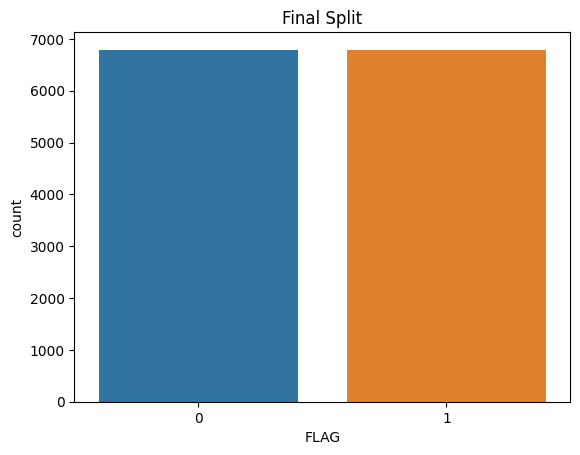

In [ ]:
#Lets try this after sending in a balanced dataset, since the above tree is really not definitive.
Large2=Large.copy()

Values_0=Large2[Large2['FLAG']==0]
print('0 Samples',Values_0.shape)

Values_1=Large2[Large2['FLAG']==1]
print('1 Samples',Values_1.shape)


#Okay, lets now resample
Values_0=Values_0.sample(Values_1.shape[0])

#Finally, lets merge
Large2=pd.concat([Values_0,Values_1])
print('Final Test Set Shape',Large2.shape)

sns.countplot(x = Large2['FLAG']).set(title='Final Split')

In [ ]:
#Lets repeat this now
X=Large2.drop(columns=['FLAG'])
y=Large2['FLAG']

#Okay now, lets dummy out every single variable (this will be massive)
X=X.astype(str)
X=pd.get_dummies(X,columns=list(X.columns))

#Lets do our train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(Large2.shape)

(13584, 303)


In [ ]:
#Lets train again

from sklearn.tree import DecisionTreeClassifier

#Lets set the following hyperparameters, using information gain as criteria
model = DecisionTreeClassifier(criterion='entropy',max_depth=5).fit(X_train,y_train)

model.score(X_test,y_test)

0.6839170198527772

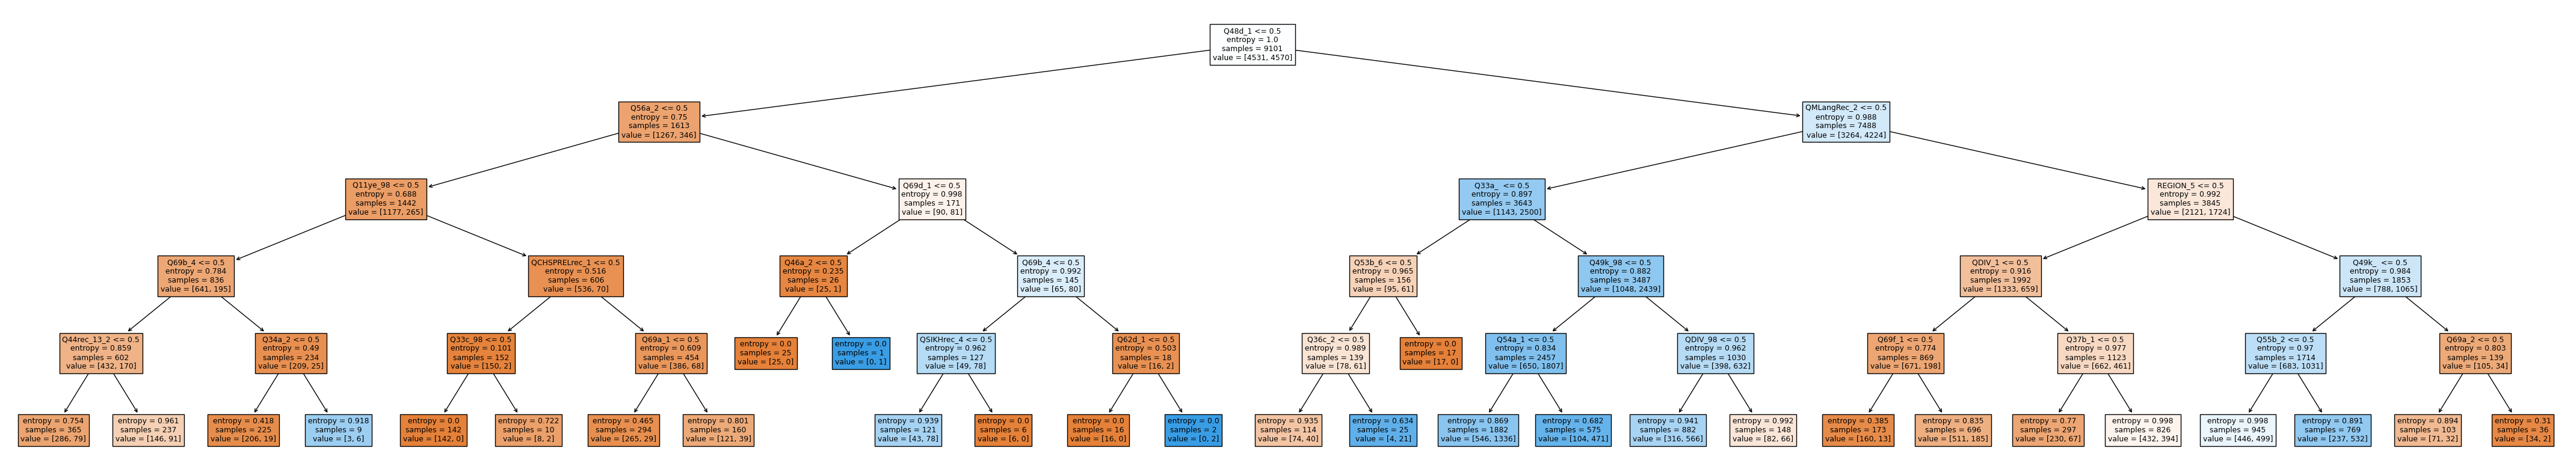

In [ ]:
#Okay our accuracy drops, but do features change?
from sklearn import tree

fig = plt.figure(figsize=(55,10))
_ = tree.plot_tree(model,
                   feature_names=list(X_train.columns),
                   filled=True)

In [ ]:
#Now lets create the feature dict
Feature_Dict={}
for i in range(0,len(X_train.columns)):

  key=list(X_train.columns)[i]
  value=list(model.feature_importances_)[i]

  Feature_Dict[key]=value

#Sort
Feature_Dict=sortDict(Feature_Dict)

#Print
for key in Feature_Dict:
  value=Feature_Dict[key]

  if value>0:
    print(key,':',value)

Q48d_1 : 0.31736100971379244
QMLangRec_2 : 0.2025874970585206
REGION_5 : 0.10843713449887851
QDIV_1 : 0.03513229308310763
Q49k_  : 0.031455215515397435
Q56a_2 : 0.030073751732572474
Q33a_  : 0.02801667879009073
Q37b_1 : 0.02799200653039134
Q69b_4 : 0.02327960777179494
Q49k_98 : 0.02325901967215336
Q55b_2 : 0.022302159733955967
Q69f_1 : 0.016002016669882494
Q11ye_98 : 0.01577271608168022
QCHSPRELrec_1 : 0.013484358769890981
Q69d_1 : 0.013325688334051221
Q54a_1 : 0.013311925262706662
Q36c_2 : 0.00971541926080664
QDIV_98 : 0.00927887748076511
Q44rec_13_2 : 0.009127929158018312
Q53b_6 : 0.008457359224328467
Q34a_2 : 0.008057645555669537
Q69a_1 : 0.007615419724370595
Q62d_1 : 0.0058415629280968795
QSIKHrec_4 : 0.005538772412767644
Q69a_2 : 0.005379566285247795
Q33c_98 : 0.005251030577932408
Q46a_2 : 0.003943338173129434


In [ ]:
import plotly.express as px

df=pd.DataFrame()
df['Question']=list(Feature_Dict.keys())
df['Feature Importance']=list(Feature_Dict.values())

<Axes: xlabel='Feature Importance', ylabel='Question'>

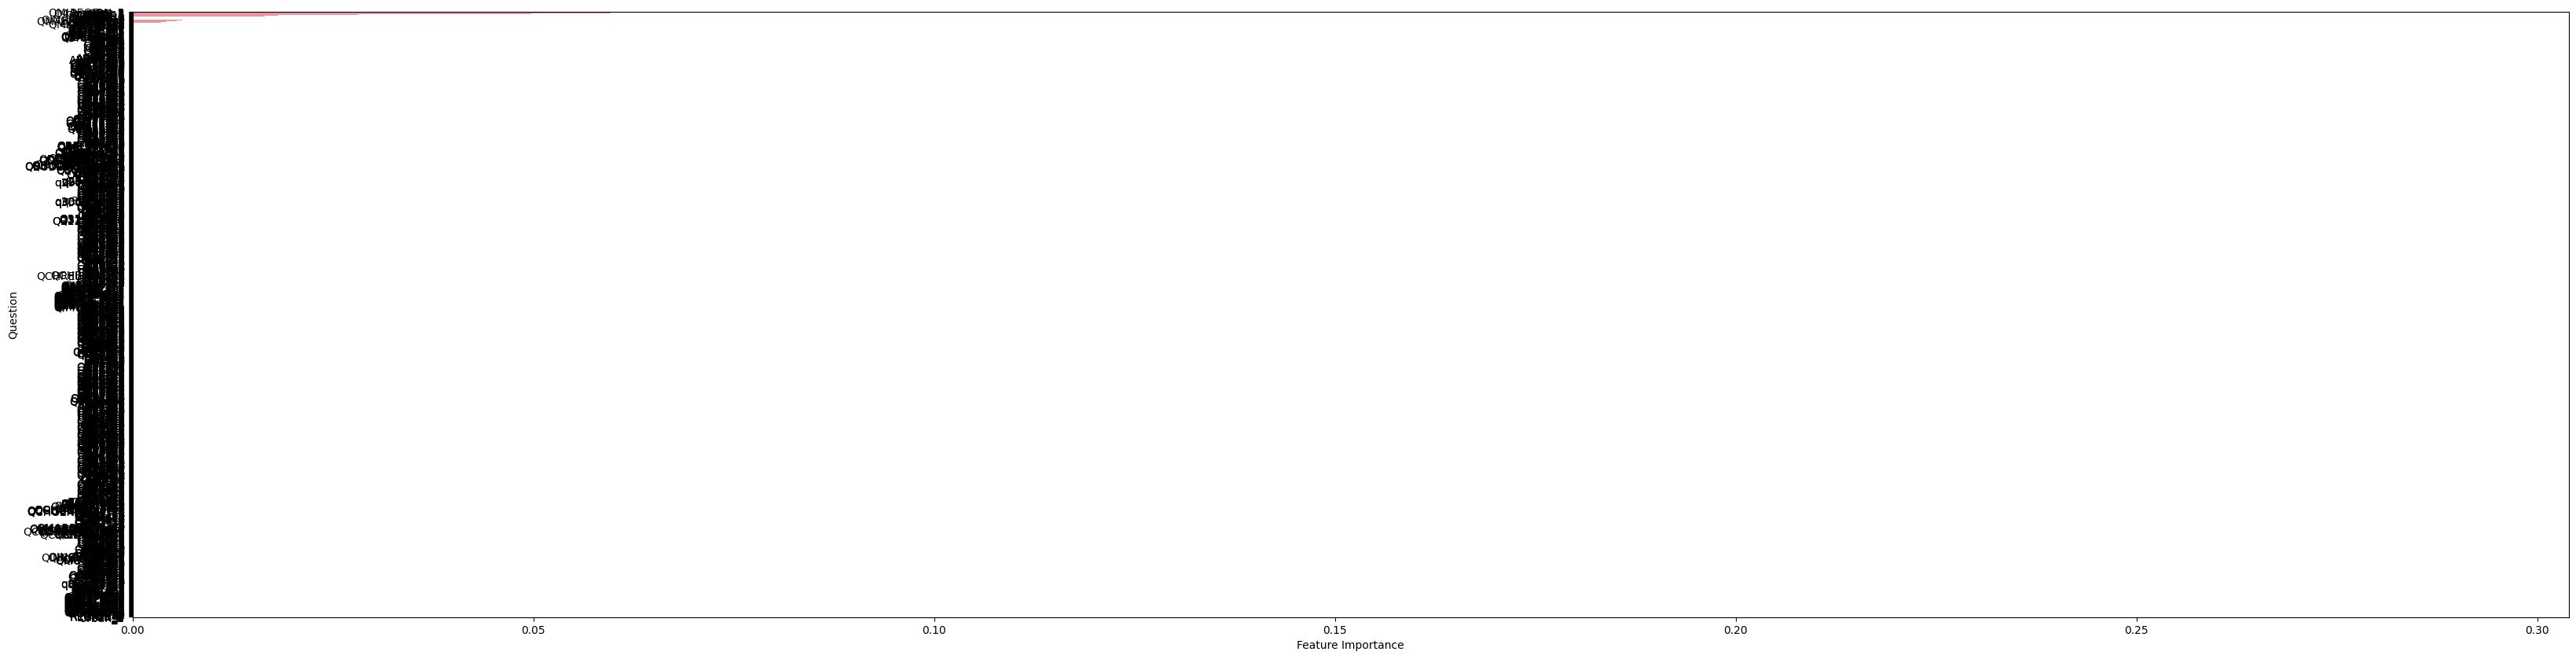

In [ ]:
fig = plt.figure(figsize=(40,10))
sns.barplot(df, x="Feature Importance", y="Question", orient='h')

In [ ]:
Large['Q55c'].value_counts().reset_index()

,index,Q55c
0,,12028
1,1,10486
2,2,7374
3,98,77
4,99,34


## 3. Logistic Regression predicting for the FLAG

* Take "Hindu Columns", clean, build model, see what comes out.

* Q2: 1 is Hindi, 2 is not Hindi
* Q3: 1->7 in decreasing order of news following
* Q3recs: 1 if selected, 2 if not, news medium.
* Q4: Economic Condition,1->4 decreasing.
* Q5: Expected Economic COndition: 1-> Worsening.
* Q11: Discrminiation against groups a->j, 1 Yes, 2 No.
* Q12: Politics interfereing with religious matters, 1->4 decreasing influence.
* Q17: Freedom to Practice (a: others, b: you), 1->4 decreasing, 5 depends/other/
* Q18: Knowledge of religions (a->f), 1->4 decreasing.
* QRELSING: REligion (1 HIndu, etc.)
* QCAste: 1-5: general-> Backward.
* QCasteb: Brahmin, other, etc.
* Q35: Importance of religion in your life, 1->5 descending.
* Q40: Religious/my religion is one true.
* QDIV: Religious Diversity benefits/harms, 1 benefit, 2 harms.
* Q61: Close friends same religion.
* Q62: religions a,b have in common.
* Q63: Willingness to accept neighbor.
* Q66: Felt discriminated.
* Q69: Important to be hindu, b
* Q77arec: Which party did you vote for, 1=bjp
* QPTYrec: Party felt closest to, 1 is bjp
* QPTY2: Favorable/unfavorable bjp congress

In [ ]:
print(len(H_Col))

46


<ipython-input-49-2aa55520a2ba>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Reg_Data[H_Col].corr())


<Axes: >

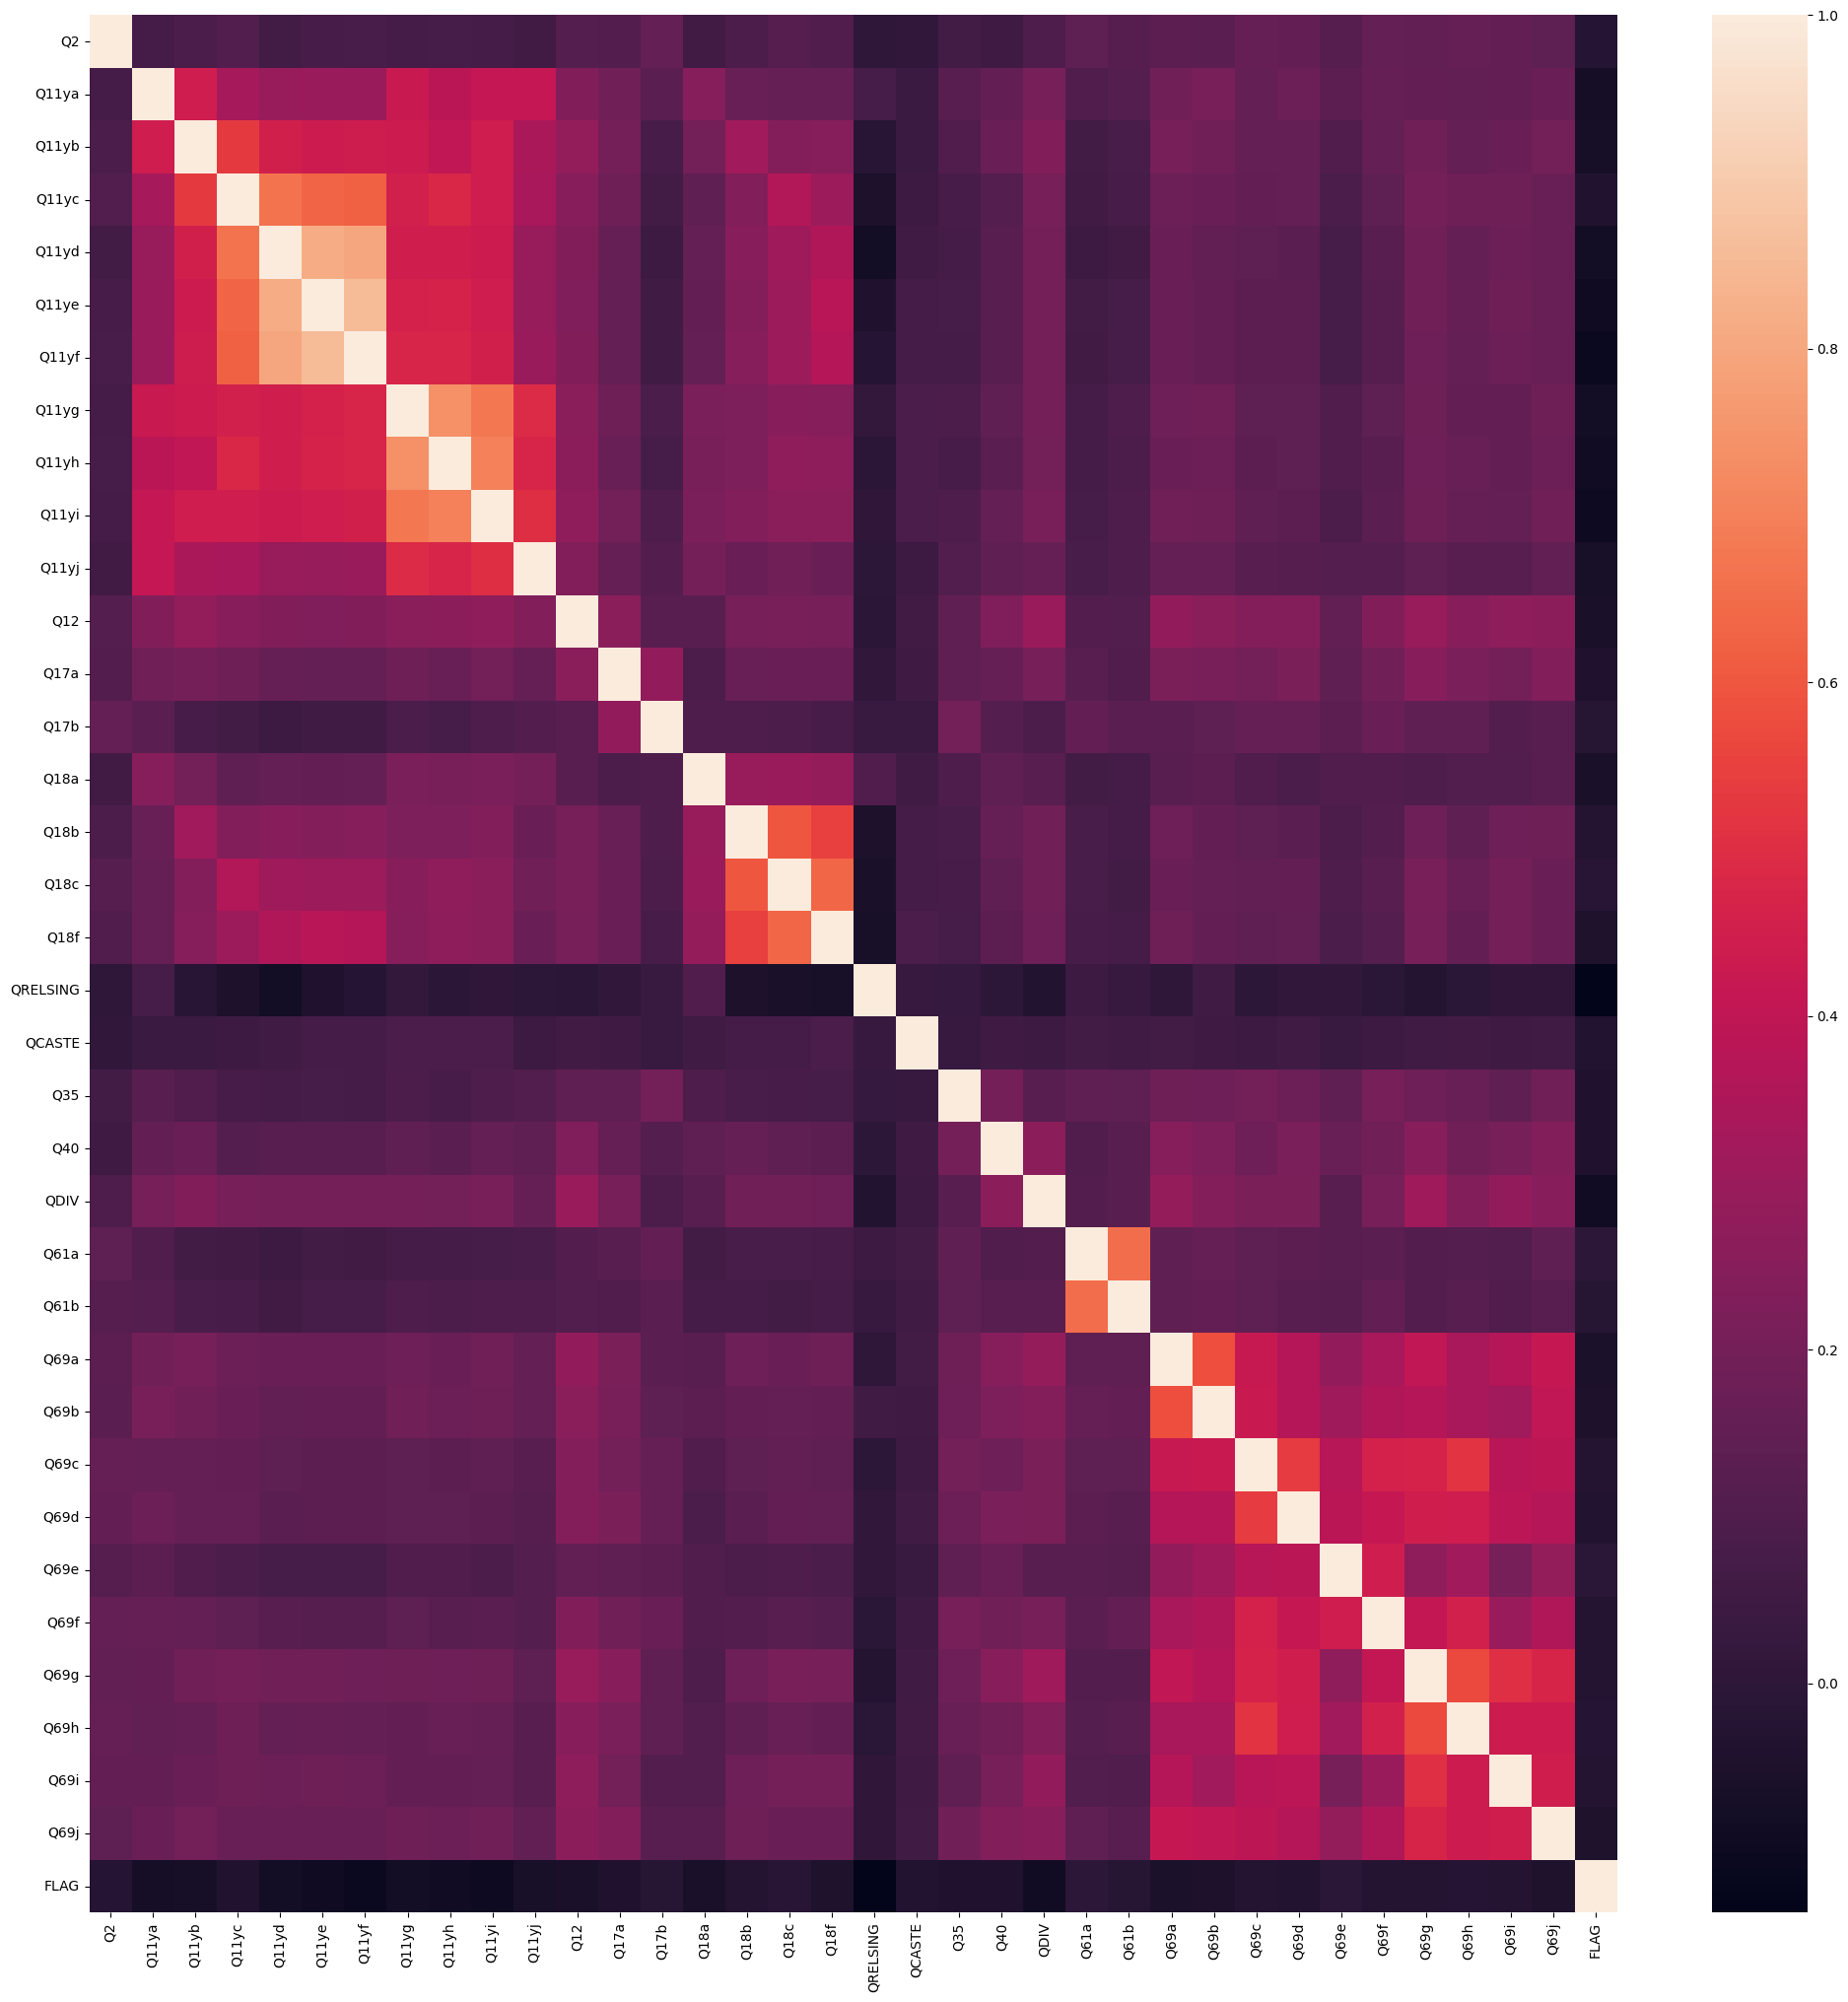

In [ ]:
# Lets check all the Hindu
Reg_Data=pd.merge(Data,Sub[['QRID','FLAG']],how='inner',on='QRID')

H_Col=['Q2','Q11ya', 'Q11yb', 'Q11yc', 'Q11yd', 'Q11ye', 'Q11yf', 'Q11yg', 'Q11yh', 'Q11yi', 'Q11yj','Q12','Q17a', 'Q17b','Q18a', 'Q18b', 'Q18c', 'Q18d', 'Q18e', 'Q18f','QRELSING', 'QCASTE', 'QCASTEb', 'QHINDU','Q35','Q40','QDIV','Q61a', 'Q61b', 'Q62a', 'Q62b', 'Q62c', 'Q62d', 'Q62e', 'Q62f','Q69a', 'Q69b', 'Q69c', 'Q69d', 'Q69e', 'Q69f', 'Q69g', 'Q69h', 'Q69i', 'Q69j','FLAG']

fig = plt.figure(figsize=(25,25))
sns.heatmap(Reg_Data[H_Col].corr())

In [ ]:
#Okay, we don't really have multicollinearity problems

X=Reg_Data[H_Col].drop(columns=['FLAG'])
y=Reg_Data[H_Col]['FLAG']

#Okay now, lets dummy out every single variable (this will be massive)
X=X.astype(str)
X=pd.get_dummies(X,columns=list(X.columns))

#Lets do our train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Lets do a logistic regression on the same one hot encoded dataset.
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=42).fit(X_train, y_train)
model.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.772020202020202

In [ ]:
#Lets abandon sklearn, and switch to statsmodel
import statsmodels.api as sm

model=sm.Logit(y_train, X_train).fit()

         Current function value: 0.458121
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                   FLAG   No. Observations:                20099
Model:                          Logit   Df Residuals:                    19885
Method:                           MLE   Df Model:                          213
Date:                Thu, 13 Jul 2023   Pseudo R-squ.:                  0.1404
Time:                        17:13:42   Log-Likelihood:                -9207.8
converged:                      False   LL-Null:                       -10712.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Q2_1           0.1459        nan        nan        nan         nan         nan
Q2_2           0.0367        nan        nan        nan         nan         nan
Q2_3           0.0713        nan        nan        n